In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('D:\ZomatoX-ML\Data\enhanced_zomato_dataset_clean.csv')
df.head()


<>:12: SyntaxWarning: invalid escape sequence '\Z'
<>:12: SyntaxWarning: invalid escape sequence '\Z'
C:\Users\Admin\AppData\Local\Temp\ipykernel_13424\2693727979.py:12: SyntaxWarning: invalid escape sequence '\Z'
  df = pd.read_csv('D:\ZomatoX-ML\Data\enhanced_zomato_dataset_clean.csv')


,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining_Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,...,Is_Bestseller,Restaurant_Popularity,Avg_Rating_Restaurant,Avg_Price_Restaurant,Avg_Rating_Cuisine,Avg_Price_Cuisine,Avg_Rating_City,Avg_Price_City,Is_Highly_Rated,Is_Expensive
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,...,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,...,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NONE,...,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,...,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,...,1,46,4.05,171.347826,3.81868,255.954894,3.939031,245.130482,1,0


In [7]:
# Define target and input features
target = 'Prices'
features = [
    'Dining_Rating', 'Delivery_Rating', 'Dining_Votes', 'Delivery_Votes',
    'Votes', 'Average_Rating', 'Total_Votes', 'Price_per_Vote', 'Log_Price',
    'Is_Bestseller', 'Restaurant_Popularity', 'Avg_Rating_Restaurant',
    'Avg_Price_Restaurant', 'Avg_Rating_Cuisine', 'Avg_Price_Cuisine',
    'Avg_Rating_City', 'Avg_Price_City', 'Is_Highly_Rated', 'Is_Expensive'
]

X = df[features]
y = df[target]


In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)


In [10]:
def evaluate(y_true, y_pred, model_name):
    print(f"📊 {model_name} Evaluation:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R² Score:", r2_score(y_true, y_pred))
    print("-" * 40)

evaluate(y_test, lr_preds, "Linear Regression")
evaluate(y_test, rf_preds, "Random Forest Regressor")


📊 Linear Regression Evaluation:
MAE: 52.70100113043788
RMSE: 81.37652209560683
R² Score: 0.8080235188425892
----------------------------------------
📊 Random Forest Regressor Evaluation:
MAE: 0.03543389940159502
RMSE: 1.4069858930980776
R² Score: 0.9999426109198969
----------------------------------------


<Axes: title={'center': 'Feature Importance'}>

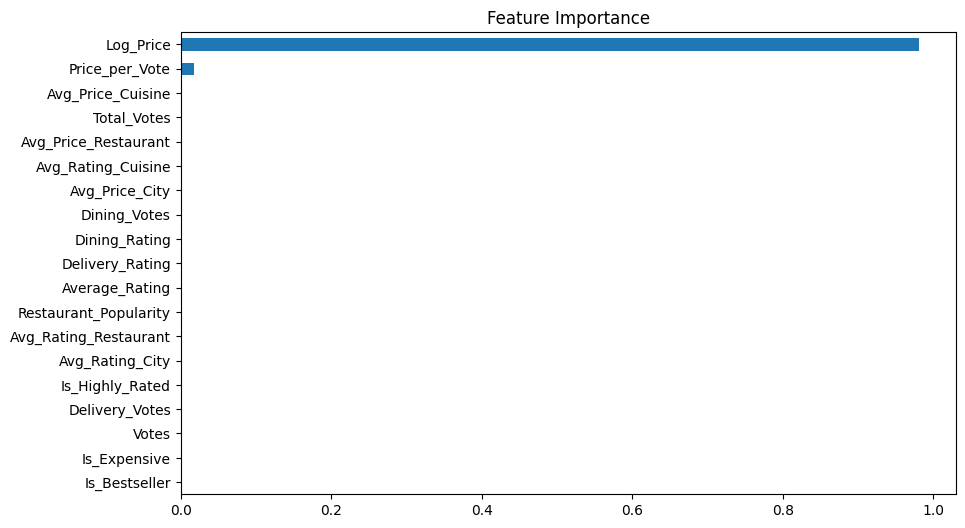

In [11]:
# Feature Importance
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values(ascending=True)
feat_imp.plot(kind='barh', figsize=(10, 6), title="Feature Importance")


In [12]:
import joblib
joblib.dump(rf, 'D:\ZomatoX-ML\Models\price_predictor_rf.pkl')
joblib.dump(scaler, 'D:\ZomatoX-ML\Models\price_scaler.pkl')


<>:2: SyntaxWarning: invalid escape sequence '\Z'
<>:3: SyntaxWarning: invalid escape sequence '\Z'
<>:2: SyntaxWarning: invalid escape sequence '\Z'
<>:3: SyntaxWarning: invalid escape sequence '\Z'
C:\Users\Admin\AppData\Local\Temp\ipykernel_13424\3066195325.py:2: SyntaxWarning: invalid escape sequence '\Z'
  joblib.dump(rf, 'D:\ZomatoX-ML\Models\price_predictor_rf.pkl')
C:\Users\Admin\AppData\Local\Temp\ipykernel_13424\3066195325.py:3: SyntaxWarning: invalid escape sequence '\Z'
  joblib.dump(scaler, 'D:\ZomatoX-ML\Models\price_scaler.pkl')


['D:\\ZomatoX-ML\\Models\\price_scaler.pkl']